# Mapeamento do Campo Magnético Local

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit

In [2]:
sns.set_theme()

In [3]:
data = pd.read_csv('dados.txt', sep='\t', decimal=',')
data['Sigma h (mm)'] *= 10 * 0.5
data['Orientação (rad)'] = np.radians(data['Orientação (°)'])
data['Sigma Orientação (rad)'] = np.radians(data['Sigma orientação (°)'])

In [4]:
data

,h_H (mm),h_V (mm),Orientação (°),Sigma h (mm),Sigma orientação (°),Orientação (rad),Sigma Orientação (rad)
0,3.0,0.0,10.0,0.5,2.0,0.174533,0.034907
1,3.0,2.0,30.0,0.5,2.0,0.523599,0.034907
2,3.0,4.0,47.0,0.5,2.0,0.820305,0.034907
3,3.0,6.0,78.0,0.5,2.0,1.361357,0.034907
4,3.0,7.0,110.2,0.5,2.0,1.923353,0.034907
5,3.0,-2.0,0.0,0.5,2.0,0.000000,0.034907
6,3.0,-4.0,-19.0,0.5,2.0,-0.331613,0.034907
7,3.0,-6.0,-53.0,0.5,2.0,-0.925025,0.034907
8,3.0,-7.0,-72.0,0.5,2.0,-1.256637,0.034907


In [29]:
def sine(x, H, A, f): return H + A * np.sin(x + f)

In [34]:
popt, pcov = curve_fit(
	sine,
	xdata=data['Orientação (rad)'],
	ydata=data['h_V (mm)']
)

In [35]:
for i in range(3):
	print(f'PARAM[{i}]:\t{popt[i]}\t{np.sqrt(pcov[i][i])}')

PARAM[0]:	0.03446402905812581	0.1991894811721648
PARAM[1]:	6.921592704779625	0.15691429491185846
PARAM[2]:	-6.524501787541227	0.040155067639393534


In [36]:
-np.degrees(popt[2])-360, np.degrees(np.sqrt(pcov[2,2]))

(13.82641585167363, 2.300715901799599)

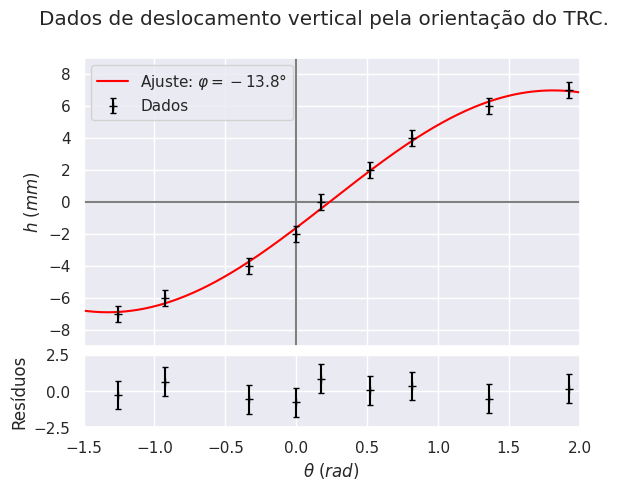

In [38]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'height_ratios': (4,1), 'hspace': 0.05 })
plt.suptitle('Dados de deslocamento vertical pela orientação do TRC.')

axs[0].vlines(x=0, ymin=-10, ymax=10, color='gray')
axs[0].hlines(y=0, xmin=-2, xmax=2, color='gray')

x = np.linspace(-2, 2, 1000)
sns.lineplot(x=x, y=sine(x, popt[0], popt[1], popt[2]), ax=axs[0], label=f"Ajuste: $\\varphi={360+np.degrees(popt[2]):.1f}\\degree$", color='red')

axs[0].errorbar(
	x=data['Orientação (rad)'],
	y=data['h_V (mm)'],
	yerr=data['Sigma h (mm)'],
	fmt=' ', marker='+', color='black', capsize=2, label='Dados'
)

axs[1].errorbar(
	x=data['Orientação (rad)'],
	y=(data['h_V (mm)'] - sine(data['Orientação (rad)'], popt[0], popt[1], popt[2])) / data['Sigma h (mm)'],
	yerr=1,
	fmt=' ', marker='+', color='black', capsize=2
)

axs[0].legend()
axs[0].set(ylim=(-9, 9), ylabel='$h$ ($mm$)')
axs[1].set(xlim=(-1.5, 2), ylim=(-2.5, 2.5), xlabel='$\\theta$ ($rad$)', ylabel='Resíduos')

plt.savefig('sine_fit.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
ngl = len(data) - 3
ngl

6

In [43]:
chi2 = np.sum( (data['h_V (mm)'] - sine(data['Orientação (rad)'], popt[0], popt[1], popt[2]))**2 / data['Sigma h (mm)']**2 )
chi2

2.572224934525034